In [1]:
import aifc
import numpy
import matplotlib.pyplot as plt

file = 'C:/Users/jorge/Downloads/small_data_sample/{}right_whale/'
audio_file = 'train{}.aiff'

file_number = 5
if file_number<=5:
    file = file.format('no_')
else:
    file = file.format('') 
audio_file = 'train{}.aiff'.format(file_number)

f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()

nfft = 256  # Length of the windowing segments
fs = 2
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(256))
plt.axis('off')

c:\users\jorge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(32.0, 1952.0, 0.0, 1.0)

In [2]:
f.getnchannels(), f.getsampwidth(), f.getframerate(), f.getnframes(), f.getcomptype(), f.getmarkers()

(1, 2, 2000, 4000, b'NONE', None)

In [3]:
f.getparams()

_aifc_params(nchannels=1, sampwidth=2, framerate=2000, nframes=4000, comptype=b'NONE', compname=b'not compressed')

(128, 87)


(0.0, 11025.0)

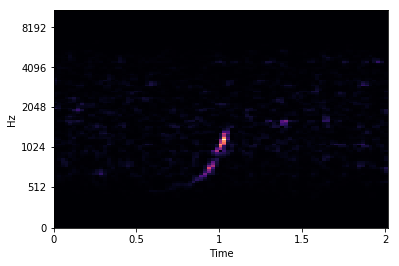

In [2]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=196)
ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
# ps = librosa.core.stft(y=y)
print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.ylim()

(1025, 87)


c:\users\jorge\appdata\local\programs\python\python36\lib\site-packages\librosa\display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


(0.0, 256)

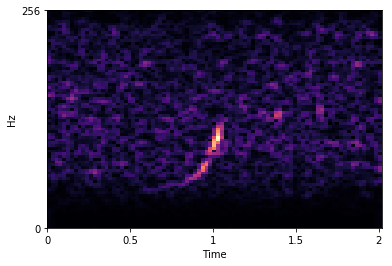

In [5]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=196)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.ylim(ymax = 256)

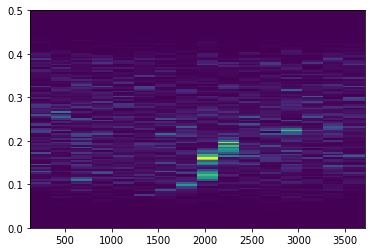

In [3]:
import scipy.signal as signal

f, t, sxx = signal.spectrogram(data)
plt.pcolormesh(t, f, sxx)

c:\users\jorge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


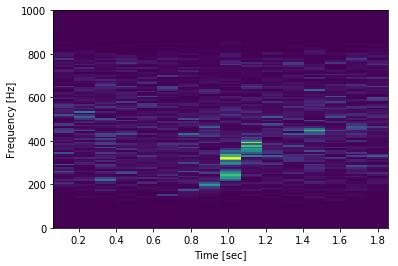

In [9]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

# sample_rate, audio = wavfile.read(path_to_wav_file)
def get_spec_par_blackman(file):

#     save_name='../KaggleData/spec_blackman/'

    with aifc.open(file, 'r') as f:
        nframes = f.getnframes()
        strsig = f.readframes(nframes)
        data = numpy.fromstring(strsig, numpy.short).byteswap()
    nfft = 256  # Length of the windowing segments
    fs = 2
    pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(256))
    plt.axis('off')
#     plt.savefig(save_name + file[20:-5] + '.png',
#                 dpi=100,  # Dots per inch
#                 frameon='false',
#                 aspect='normal',
#                 bbox_inches='tight',
#                 pad_inches=0)  # Spectrogram saved as a .png
    return pxx, freqs, bins, im 

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)


f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()
sample_freq, segment_time, spec_data = log_specgram(data, f.getframerate())
sample_freq, segment_time, spec_data = signal.spectrogram(data, f.getframerate())  
plt.pcolormesh(segment_time, sample_freq, spec_data )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda

(-0.5, 198.5, -0.5, 20.5)

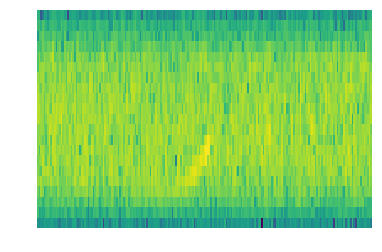

In [8]:
sample_freq, segment_time, spectrogram = log_specgram(data, f.getframerate())
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')

c:\users\jorge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


(32.0, 1952.0, 0.0, 1.0)

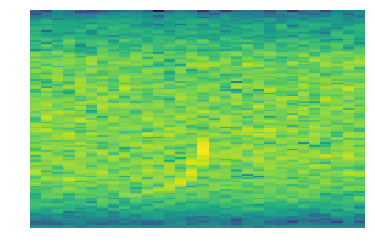

In [15]:
sample_freq, segment_time, spectrogram, a = get_spec_par_blackman(file+audio_file)
# plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')

In [ ]:
def get_spec_par_blackman(file):

    save_name='../KaggleData/spec_blackman/'

    with aifc.open(file, 'r') as f:
        nframes = f.getnframes()
        strsig = f.readframes(nframes)
        data = numpy.fromstring(strsig, numpy.short).byteswap()
    nfft = 256  # Length of the windowing segments
    fs = 2
    pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(256))
    plt.axis('off')
    plt.savefig(save_name + file[20:-5] + '.png',
                dpi=100,  # Dots per inch
                frameon='false',
                aspect='normal',
                bbox_inches='tight',
                pad_inches=0)  # Spectrogram saved as a .png
    
def get_spect(func, image):
    